# Plot Electricity Usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")

In [2]:
dates = pd.read_excel("./data/electricityData.xlsx", sheet_name="dates", header=None, converters={0: pd.to_datetime})
sectors = pd.read_excel("./data/electricityData.xlsx", sheet_name="sectors", header=None, converters={0: str})
usage = pd.read_excel("./data/electricityData.xlsx", sheet_name="usage", header=None)

In [3]:
def smooth(a, n):
    """
    a: NumPy 1-D array containing the data to be smoothed
    n: smoothing window size needs, which must be odd number
    """

    out0 = np.convolve(a, np.ones(n, dtype=int), 'valid') / n    
    r = np.arange(1, n-1, 2)
    start = np.cumsum(a[:n-1])[::2] / r
    stop = (np.cumsum(a[:-n:-1])[::2] / r)[::-1]
    
    return np.concatenate((start, out0, stop))

smooth_usage = usage.copy()

for column in usage.columns:
    smooth_usage[column] = smooth(smooth_usage[column], 25)

In [4]:
smooth_total = smooth_usage.iloc[:, -1]
smooth_sector_usage =smooth_usage.iloc[:, :3]

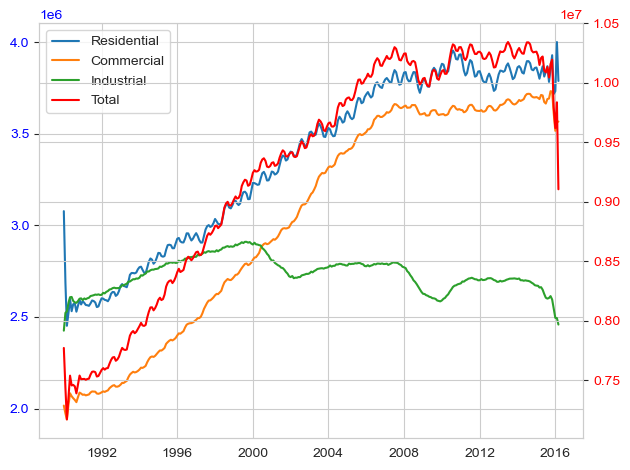

In [5]:
fig, ax1 = plt.subplots()

line_1 = ax1.plot(dates, smooth_sector_usage)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
line_2 = ax2.plot(dates, smooth_total, color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(line_1 + line_2, sectors.iloc[0], loc=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()